# 6.5 Unsupervised Machine Learning - Clustering

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting and standardizing data
#### 3. The elbow technique
#### 4. k-means clustering

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Display charts in the notebook 

%matplotlib inline

In [3]:
# Remove max column and row display restrictions

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# Define path

path = r'C:\Users\polly\Documents\Achievement 6 Project'

In [5]:
# Import merged dataframe from last exercise

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'gdp_wbl_merged.csv'),index_col=False)

In [6]:
# Check size of dataframe

df.shape

(5859, 17)

In [7]:
# Check dataframe output

df.head()

,country_year,country,country_code,region,income_group,year,wbl_index,mobility,workplace,pay,marriage,parenthood,business,assets,pension,gdp_per_capita,_merge
0,AFG1991,Afghanistan,AFG,South Asia,Low income,1991,25.6,25,25,0,20,20,75,40,0,183.532775,both
1,AFG1992,Afghanistan,AFG,South Asia,Low income,1992,25.6,25,25,0,20,20,75,40,0,183.532775,both
2,AFG1993,Afghanistan,AFG,South Asia,Low income,1993,25.6,25,25,0,20,20,75,40,0,183.532775,both
3,AFG1994,Afghanistan,AFG,South Asia,Low income,1994,25.6,25,25,0,20,20,75,40,0,183.532775,both
4,AFG1995,Afghanistan,AFG,South Asia,Low income,1995,25.6,25,25,0,20,20,75,40,0,183.532775,both


In [8]:
# Check data statistics

df.describe()

,year,wbl_index,mobility,workplace,pay,marriage,parenthood,business,assets,pension,gdp_per_capita
count,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000,5859.000000
mean,2006.000000,65.247602,84.387267,54.279741,52.380952,67.619048,41.443932,76.250213,78.798430,66.692268,10190.289603
std,8.945035,18.350535,25.469140,34.387437,31.501179,29.962665,31.049098,18.449488,26.978049,27.615786,15993.820883
min,1991.000000,17.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.850371
25%,1998.000000,53.800000,75.000000,25.000000,25.000000,40.000000,20.000000,75.000000,60.000000,50.000000,975.496098
50%,2006.000000,66.300000,100.000000,50.000000,50.000000,80.000000,40.000000,75.000000,100.000000,75.000000,3292.498412
75%,2014.000000,78.800000,100.000000,100.000000,75.000000,100.000000,60.000000,75.000000,100.000000,100.000000,11614.476955
max,2021.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,133590.147000


### 2. Subsetting and standardizing data

In [9]:
# Create subset of dataframe with numeric values only: wbl_index and gdp_per_capita 
# wbl_index is the average of the other indicators; so we only need to include wbl_index along with gdp_per_capita

df_gdp_wbl = df[['wbl_index', 'gdp_per_capita']]

In [10]:
# Check output

df_gdp_wbl.head()

,wbl_index,gdp_per_capita
0,25.6,183.532775
1,25.6,183.532775
2,25.6,183.532775
3,25.6,183.532775
4,25.6,183.532775


In [11]:
# Define standard scaler

scaler = StandardScaler()

In [12]:
# Transform data

standardized_data = scaler.fit_transform(df_gdp_wbl)

In [13]:
standardized_data

array([[-2.16075372, -0.62571733],
       [-2.16075372, -0.62571733],
       [-2.16075372, -0.62571733],
       ...,
       [ 1.18003353, -0.54828483],
       [ 1.18003353, -0.55135953],
       [ 1.18003353, -0.52627121]])

In [14]:
# Convert array to database

df_standardized = pd.DataFrame(standardized_data, columns=df_gdp_wbl.columns)

In [15]:
# Check output

df_standardized.head()

,wbl_index,gdp_per_capita
0,-2.160754,-0.625717
1,-2.160754,-0.625717
2,-2.160754,-0.625717
3,-2.160754,-0.625717
4,-2.160754,-0.625717


In [16]:
# Check size

df_standardized.shape

(5859, 2)

### 3. The elbow technique

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
# Creates a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(df_standardized).score(df_standardized) for i in range(len(kmeans))] 

score

[-11718.000000000011,
 -6315.0357112194215,
 -3695.97079380915,
 -2755.4804728723457,
 -2178.232071581269,
 -1789.370131683116,
 -1446.413056426827,
 -1202.9391226951593,
 -1064.694499442031]

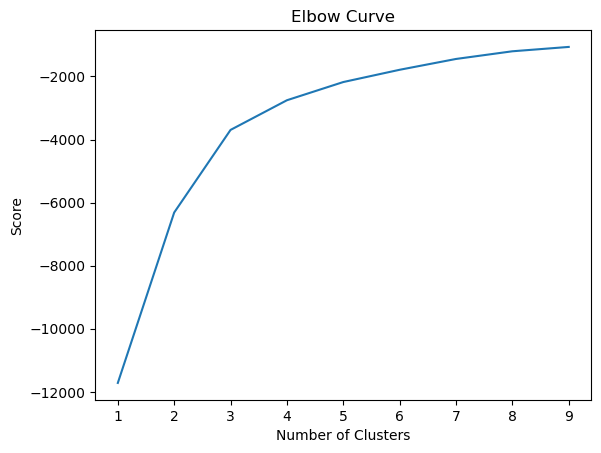

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 4. k-means clustering

In [20]:
# Create the k-means object with 3 clusters (where the curve begins to flatten out)

kmeans = KMeans(n_clusters = 3) 

The scores above represent the rate of variation for each given cluster option from 1 to 10; this rate (curve) increases sharply from 1 to 2 and 2 to 3, but begins to flatten out at 3. Therefore, 3 is the optimal count for the number of clusters.

In [21]:
# Fit the k-means object to the data.

kmeans.fit(df_standardized)

KMeans(n_clusters=3)

In [22]:
# Create 'clusters' column to correspond with k-means cluster values

df_standardized['clusters'] = kmeans.fit_predict(df_standardized)

In [23]:
# Check output

df_standardized.head()

,wbl_index,gdp_per_capita,clusters
0,-2.160754,-0.625717,0
1,-2.160754,-0.625717,0
2,-2.160754,-0.625717,0
3,-2.160754,-0.625717,0
4,-2.160754,-0.625717,0


In [24]:
# Check frequency of each cluster

df_standardized['clusters'].value_counts()

2    3010
0    2071
1     778
Name: clusters, dtype: int64

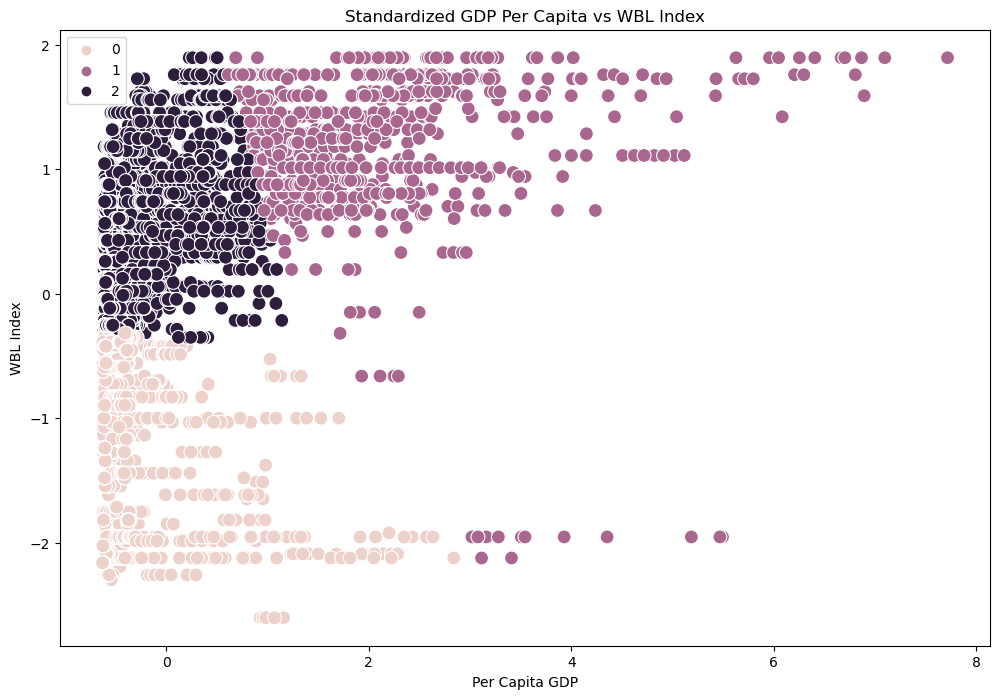

In [25]:
# Plot the clusters for the standardized "WBL Index" and "Per Capita GDP" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_standardized['gdp_per_capita'], y=df_standardized['wbl_index'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
plt.title('Standardized GDP Per Capita vs WBL Index')  
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Per Capita GDP') # Label x-axis.
plt.ylabel('WBL Index') # Label y-axis.
plt.show()

In [26]:
# Create a 'cluster' column that corresponds to k-mean cluster values

df_gdp_wbl.loc[df_standardized['clusters'] == 2, 'cluster'] = 'dark purple'
df_gdp_wbl.loc[df_standardized['clusters'] == 1, 'cluster'] = 'purple'
df_gdp_wbl.loc[df_standardized['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\polly\AppData\Local\Temp\ipykernel_23284\1388908920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp_wbl.loc[df_standardized['clusters'] == 2, 'cluster'] = 'dark purple'


In [27]:
# Check output

df_gdp_wbl.head()

,wbl_index,gdp_per_capita,cluster
0,25.6,183.532775,pink
1,25.6,183.532775,pink
2,25.6,183.532775,pink
3,25.6,183.532775,pink
4,25.6,183.532775,pink


In [28]:
# Check statistics of variables by cluster

df_gdp_wbl.groupby('cluster').agg({'wbl_index':['mean', 'median', 'min', 'max'], 
                           'gdp_per_capita':['mean', 'median', 'min', 'max']})

wbl_index                     gdp_per_capita                \
                  mean median   min    max           mean        median   
cluster                                                                   
dark purple  73.130066   71.9  58.8  100.0    5865.206873   3671.414997   
pink         45.489087   47.5  17.5   59.4    3920.613789   1282.572144   
purple       87.347429   88.8  26.3  100.0   43613.165734  40458.389640   

                                         
                      min           max  
cluster                                  
dark purple     60.458214   28413.82644  
pink            22.850371   55601.27551  
purple       19935.381460  133590.14700

The dark purple cluster has the highest mean/median for both wbl_index (87/89) and gdp_per_capita (43K/40K), followed by the pink cluster and than the purple cluster; however, the dark purple cluster has a lower minimum wbl_index (26) than the pink cluster (59) - they both have the same maximum wbl_index (100). The purple cluster has a higher max gdp (56K) than the pink cluster (28K), even though its mean/median is less. The purple and dark purple clusters are more spread out than the pink cluster, and seem to have values farther beyond the mean/median values. Therefore, I don't think that k means is the most effective algorithm for the data. For future analysis, I think it will be important to evaluate the different countries/regions over time to make more sense of the data.

Added section below to add 'cluster' column to main dataframe and use in Tableau to colour scatterplot

In [33]:
clusters=df_gdp_wbl['cluster']

In [34]:
df2=df.join(clusters)

In [35]:
df2.head()

,country_year,country,country_code,region,income_group,year,wbl_index,mobility,workplace,pay,marriage,parenthood,business,assets,pension,gdp_per_capita,_merge,cluster
0,AFG1991,Afghanistan,AFG,South Asia,Low income,1991,25.6,25,25,0,20,20,75,40,0,183.532775,both,pink
1,AFG1992,Afghanistan,AFG,South Asia,Low income,1992,25.6,25,25,0,20,20,75,40,0,183.532775,both,pink
2,AFG1993,Afghanistan,AFG,South Asia,Low income,1993,25.6,25,25,0,20,20,75,40,0,183.532775,both,pink
3,AFG1994,Afghanistan,AFG,South Asia,Low income,1994,25.6,25,25,0,20,20,75,40,0,183.532775,both,pink
4,AFG1995,Afghanistan,AFG,South Asia,Low income,1995,25.6,25,25,0,20,20,75,40,0,183.532775,both,pink


In [36]:
# Export dataframe with new column

df2.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'new_cluster_column.csv'),index=False)